# Heart failure classifier 
### import library 

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

In [3]:
data=pd.read_csv("heart.csv")
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


Data Content

Age: age of the patient [years]

Sex: sex of the patient [M: Male, F: Female]

ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

Typical angina (TA) is defined as substernal chest pain precipitated by physical exertion or emotional stress and relieved with rest or nitroglycerin. 

ATA:
Atypical angina is a classification of a form of chest pain called angina. The term “atypical” is used to describe a form of anginal chest pain that does not fit the typical presentation. Chest pain is often characterized as squeezing, pressure, heaviness, or tightness.

NAP:Noncardiac chest pain is defined as recurring pain in your chest — typically, behind your breast bone and near your heart — that is not related to your heart. In most people, noncardiac chest pain is actually related to a problem with their esophagus, most often gastroesophageal reflux disease (GERD)

EASY: Asymptomatic If someone with a disease is asymptomatic , they do not show any symptoms of the disease


RestingBP: resting blood pressure [mm Hg]

Cholesterol: serum cholesterol [mm/dl]

FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]


MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]

ExerciseAngina: exercise-induced angina [Y: Yes, N: No]

Oldpeak: oldpeak = ST [Numeric value measured in depression]

ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

HeartDisease: output class [1: heart disease, 0: Normal]


### EDA

In [10]:
data.info() # to show information about data like if there is missing values and data type for each feature

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


##### there is no missing data 

In [8]:
data.describe() 

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


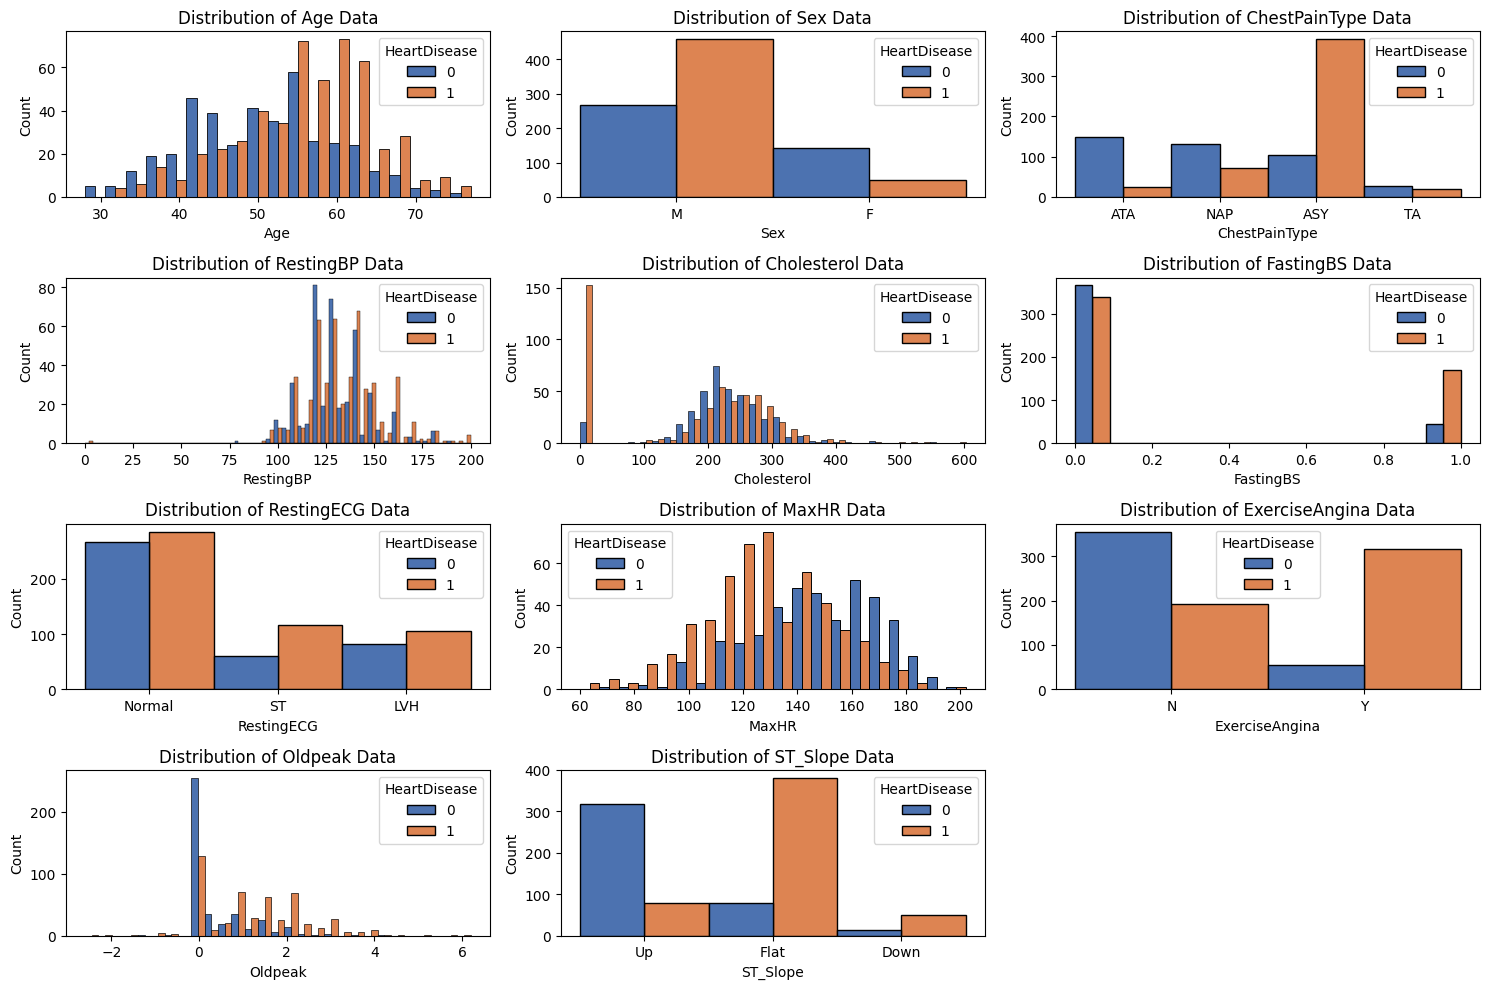

In [28]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(data.columns[:-1], 1):  # Exclude the target column from looping
    plt.subplot(4, 3, i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(data, x=col, hue='HeartDisease', multiple="dodge", palette="deep", alpha=1)
    plt.tight_layout()

plt.show()

[]

<Figure size 1500x1000 with 0 Axes>

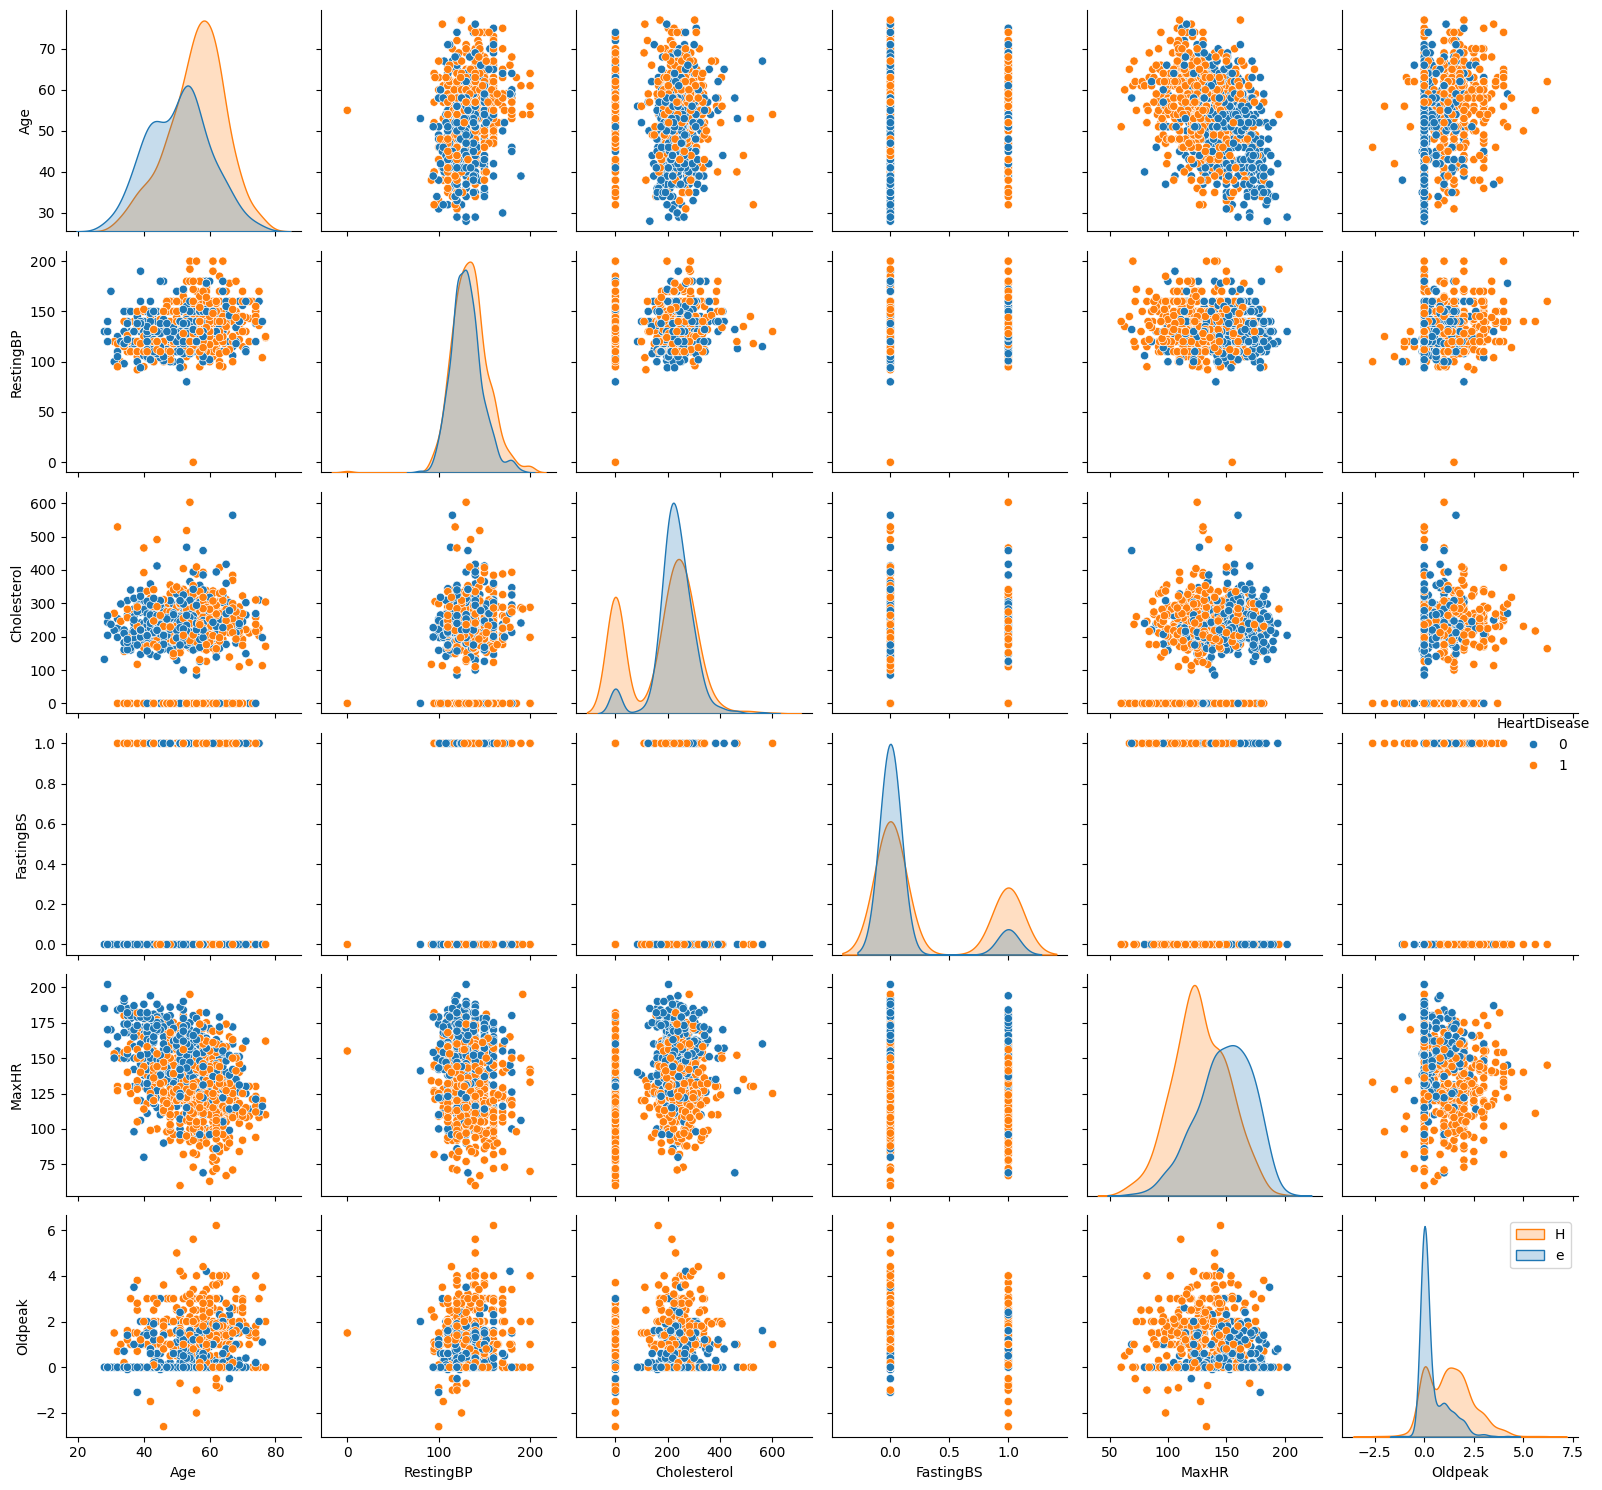

In [29]:
plt.figure(figsize=(15,10))
sns.pairplot(data,hue="HeartDisease")
plt.legend("HeartDisease")
plt.tight_layout()
plt.plot()

In [51]:
#split the target (the output )in variable name y
y=data.HeartDisease #label (class)
X=data.drop("HeartDisease",axis = 1)#features 
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up


#### The following code converts categorical string data to numerical values
#### to resolve the "could not convert string to float" error when calculating the correlation matrix.

In [58]:
encoder = LabelEncoder()
col = X.columns       # .columns gives columns names in data 
print(col)
for a in col:
    X[a] = encoder.fit_transform(X[a])
X



Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'],
      dtype='object')


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,12,1,1,41,147,0,1,98,0,10,2
1,21,0,2,55,40,0,1,82,0,20,1
2,9,1,1,31,141,0,2,25,0,10,2
3,20,0,0,39,72,0,1,34,1,25,1
4,26,1,2,49,53,0,1,48,0,10,2
...,...,...,...,...,...,...,...,...,...,...,...
913,17,1,3,14,122,0,1,58,0,22,1
914,40,1,0,45,51,1,1,67,0,42,1
915,29,1,0,31,9,0,1,41,1,22,1
916,29,0,1,31,94,0,0,100,0,10,1


<Axes: >

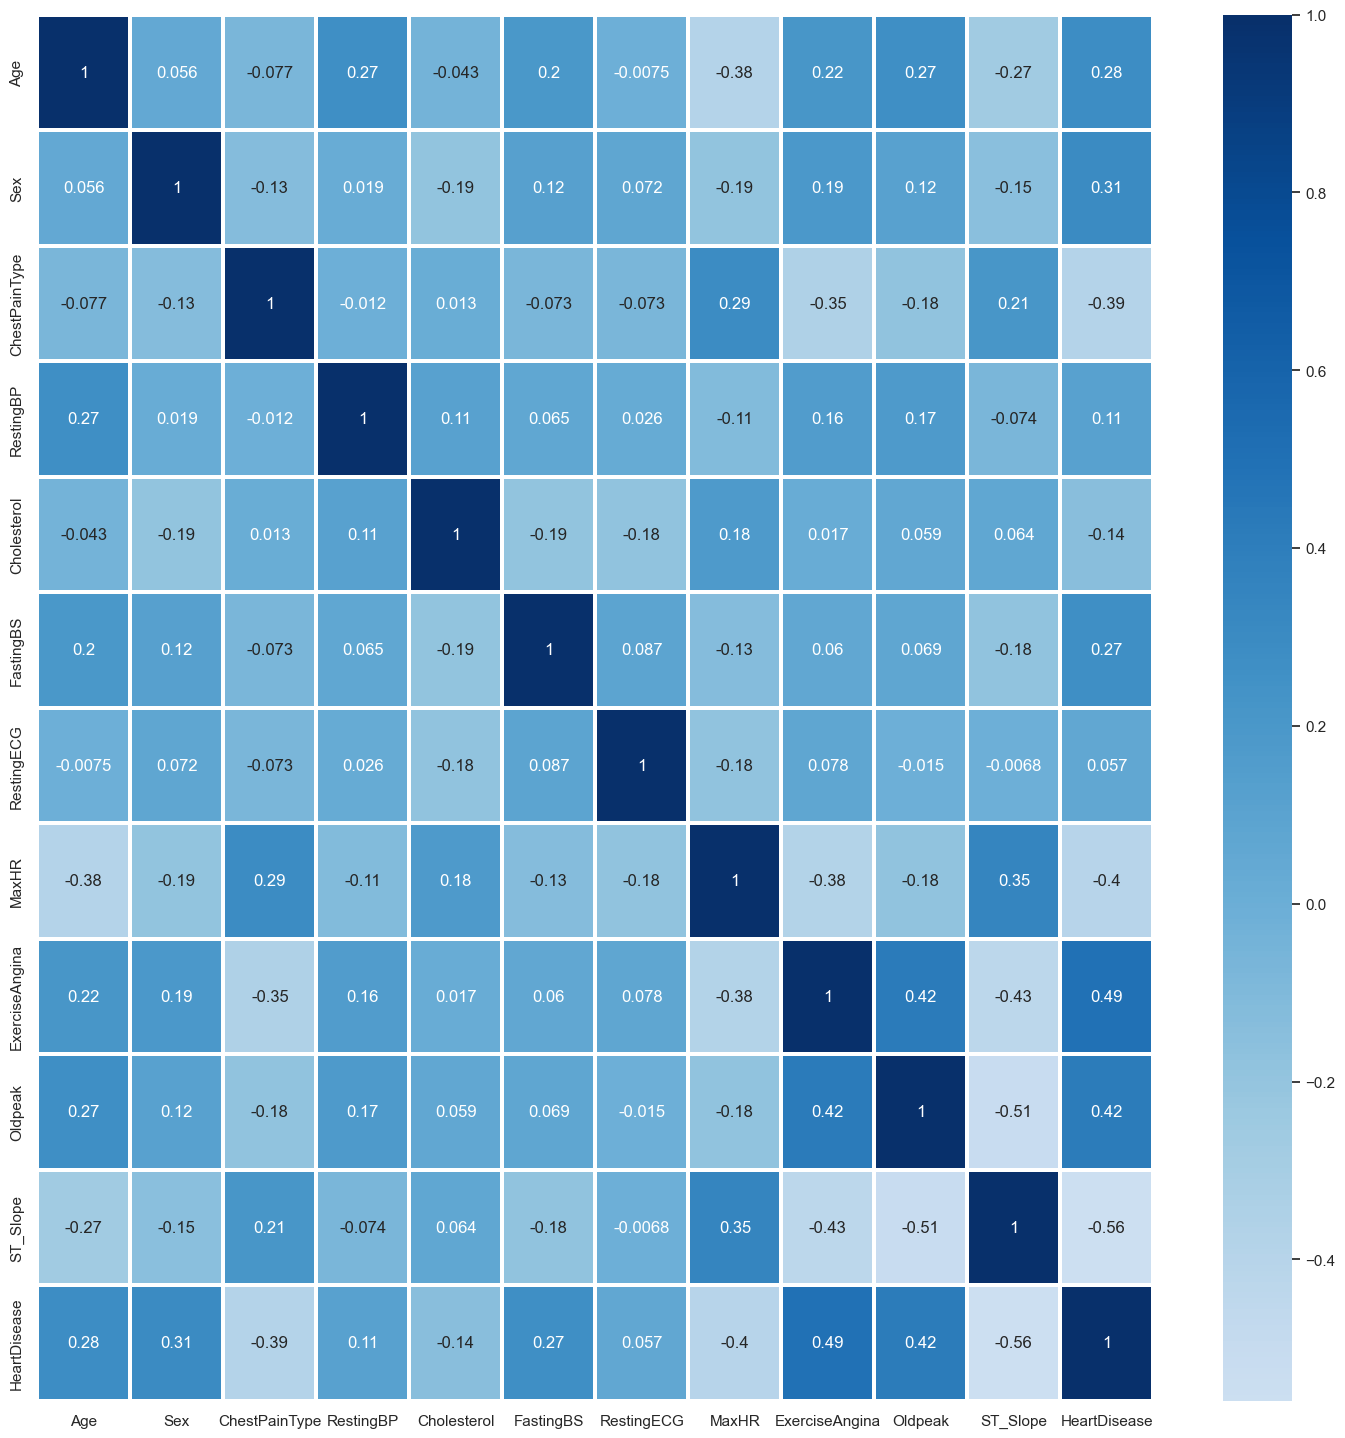

In [81]:
data_ = pd.concat([X,y],axis=1)
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data_.corr(), annot=True, cmap='Blues',center=0,linewidths=1.5,ax=ax)

In [60]:
sns.set(style="whitegrid", palette="muted")
data_dia = y
#data_ = X
data__ = X
data_encod_stand = (data__ - data__.mean()) / (data__.std())              # standardization
data_ = pd.concat([y,data_encod_stand],axis=1)
data_v= pd.melt(data_,id_vars="HeartDisease",
                    var_name="features",
                    value_name='value')


C:\Users\zahra\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 67.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\zahra\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 98.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\zahra\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 96.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\zahra\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 68.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\zahra\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 56.2% of the points

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Age'),
  Text(1, 0, 'Sex'),
  Text(2, 0, 'ChestPainType'),
  Text(3, 0, 'RestingBP'),
  Text(4, 0, 'Cholesterol'),
  Text(5, 0, 'FastingBS'),
  Text(6, 0, 'RestingECG'),
  Text(7, 0, 'MaxHR'),
  Text(8, 0, 'ExerciseAngina'),
  Text(9, 0, 'Oldpeak'),
  Text(10, 0, 'ST_Slope')])

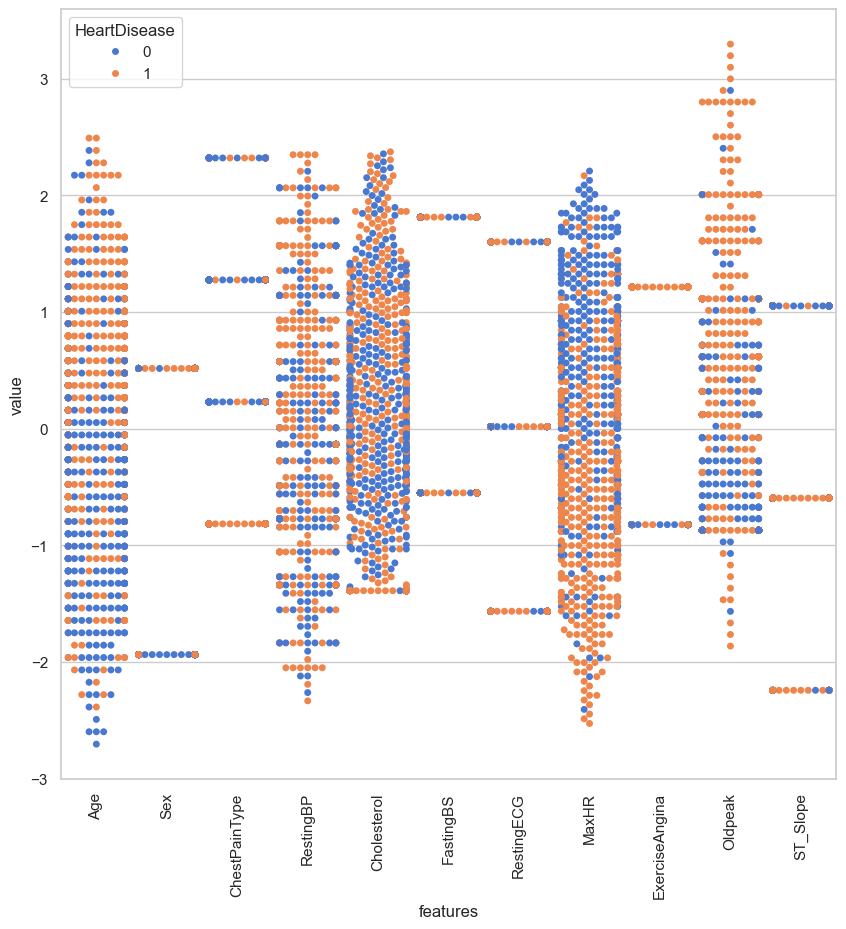

In [63]:
plt.figure(figsize=(10,10))
tic = time.time()
sns.swarmplot(x="features", y="value", hue="HeartDisease", data=data_v)

plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Age'),
  Text(1, 0, 'Sex'),
  Text(2, 0, 'ChestPainType'),
  Text(3, 0, 'RestingBP'),
  Text(4, 0, 'Cholesterol'),
  Text(5, 0, 'FastingBS'),
  Text(6, 0, 'RestingECG'),
  Text(7, 0, 'MaxHR'),
  Text(8, 0, 'ExerciseAngina'),
  Text(9, 0, 'Oldpeak'),
  Text(10, 0, 'ST_Slope')])

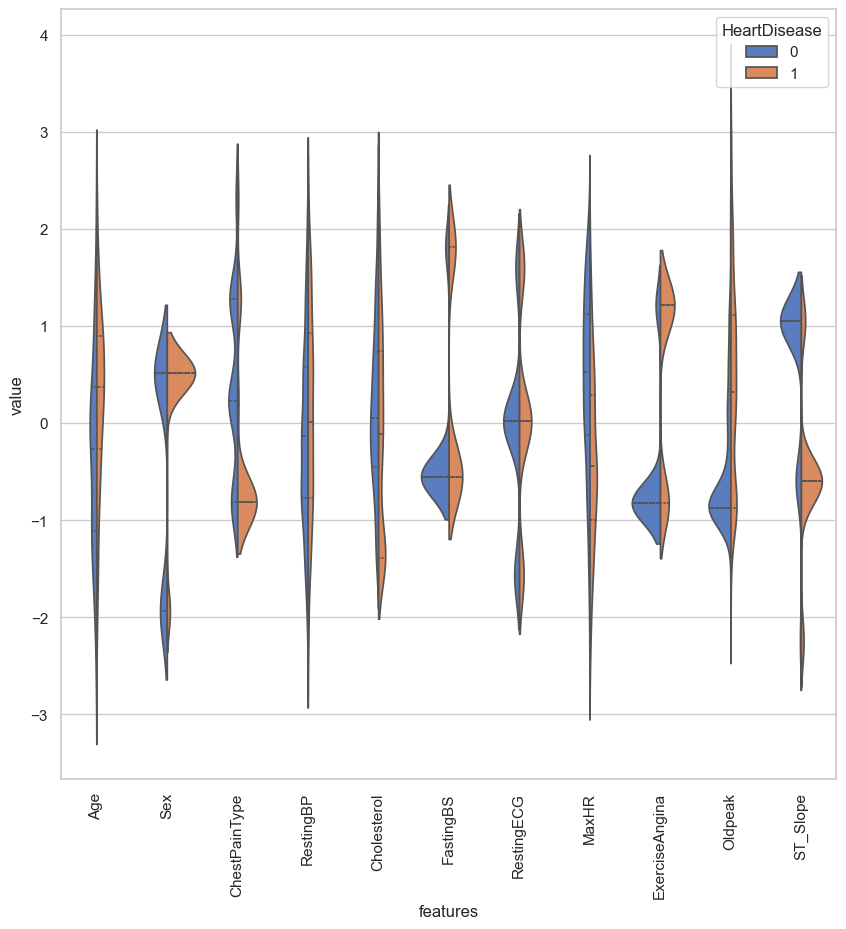

In [64]:
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="HeartDisease", data=data_v,split=True, inner="quart")
plt.xticks(rotation=90)

#### Based on the following violin and swarm plots, we will select features that show better separation between classes.
#### Features with greater separation are likely to be more informative for predicting heart disease.

In [66]:
X1=data_encod_stand.drop(['RestingECG','FastingBS','Cholesterol','RestingBP','MaxHR'],axis=1)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=44, shuffle =True)

#Splitted Data
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (642, 6)
X_test shape is  (276, 6)
y_train shape is  (642,)
y_test shape is  (276,)


### classifier 

In [75]:
# Initialize and train the model
GBCModel = GradientBoostingClassifier(n_estimators=25, max_depth=1, random_state=43)
GBCModel.fit(X_train, y_train)


GradientBoostingClassifier(max_depth=1, n_estimators=25, random_state=43)

### performence 

In [79]:
print('GBCModel Train Score: ', GBCModel.score(X_train, y_train))
print('GBCModel Test Score: ', GBCModel.score(X_test, y_test))
print('GBCModel Feature Importances: ', GBCModel.feature_importances_)
print('----------------------------------------------------')

# Calculating Predictions
y_pred = GBCModel.predict(X_test)

# Generating Classification Report
ClassificationReport = classification_report(y_test, y_pred)
print('Classification Report:\n', ClassificationReport)
print('----------------------------------------------------')

# Calculating ROC AUC Score
ROCAUCScore = roc_auc_score(y_test, y_pred, average='micro') # Options: 'macro', 'weighted', 'samples'
print('ROC AUC Score: ', ROCAUCScore)
print('----------------------------------------------------')


GBCModel Train Score:  0.8489096573208723
GBCModel Test Score:  0.8659420289855072
GBCModel Feature Importances:  [0.         0.03972006 0.32632444 0.07167144 0.01123855 0.55104551]
----------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.82      0.85       126
           1       0.86      0.91      0.88       150

    accuracy                           0.87       276
   macro avg       0.87      0.86      0.86       276
weighted avg       0.87      0.87      0.87       276

----------------------------------------------------
ROC AUC Score:  0.862063492063492
----------------------------------------------------


### Confusion Matrix

Confusion Matrix:
 [[103  23]
 [ 14 136]]


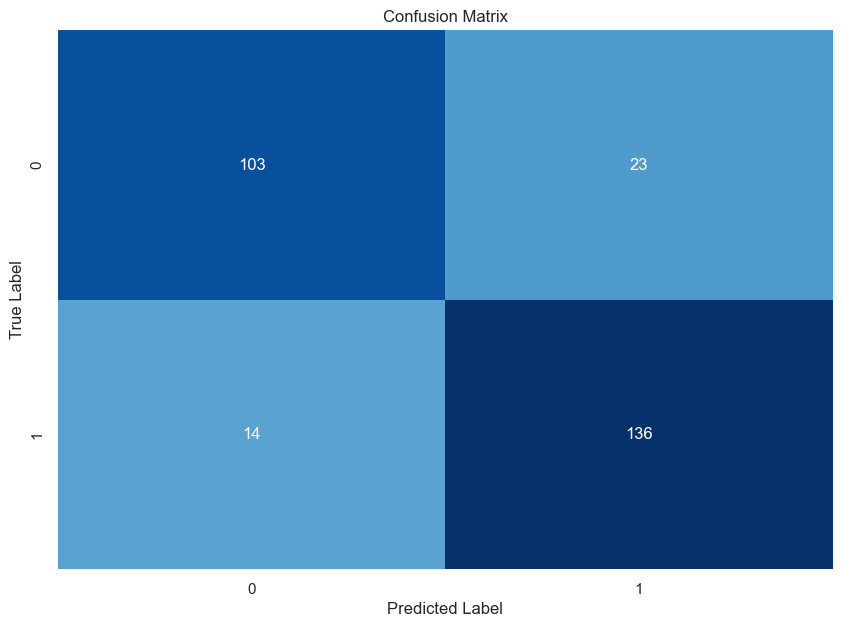

In [78]:
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', CM)

# Enhanced Confusion Matrix Heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(CM, annot=True, fmt='d', cmap='Blues', cbar=False, center=0)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()